# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)

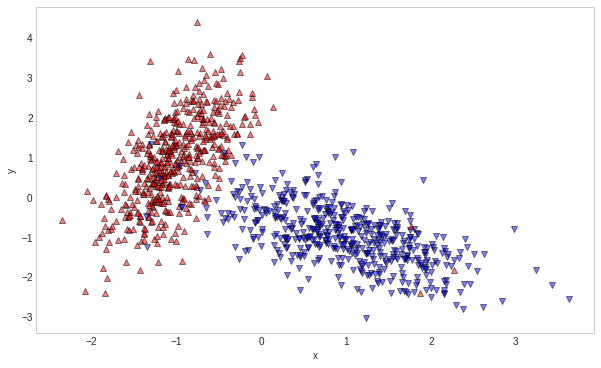

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='^', color='r')
  else:
    ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='v', color='b')
  
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9725
평가 데이터 점수: 0.99


In [ ]:
scores = cross_val_score(model,X,y, scoring='accuracy', cv=10)
print('CV 평균 점수: {}'.format(scores.mean()))

CV 평균 점수: 0.976


In [ ]:
model.intercept_, model.coef_

(array([1.41237907]), array([[ 3.44369766, -1.35482455]]))

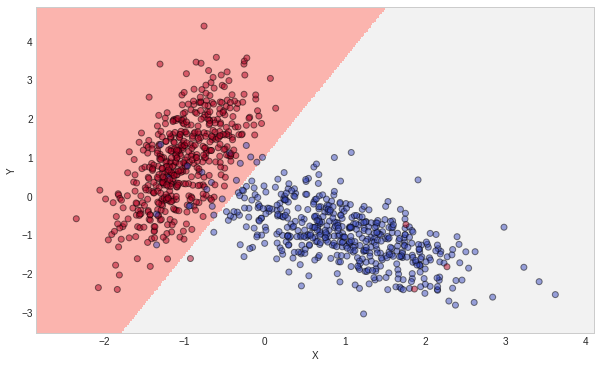

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() +.5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:,0], X[:,1], c=np.abs(y-1),edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

## 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [ ]:
import pandas as pd


iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


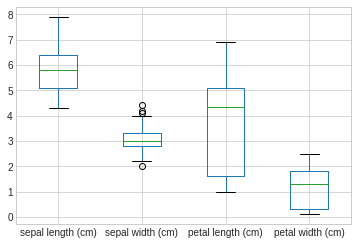

In [ ]:
iris_df.boxplot();

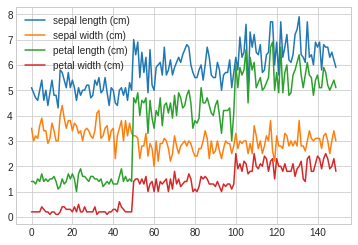

In [ ]:
iris_df.plot();

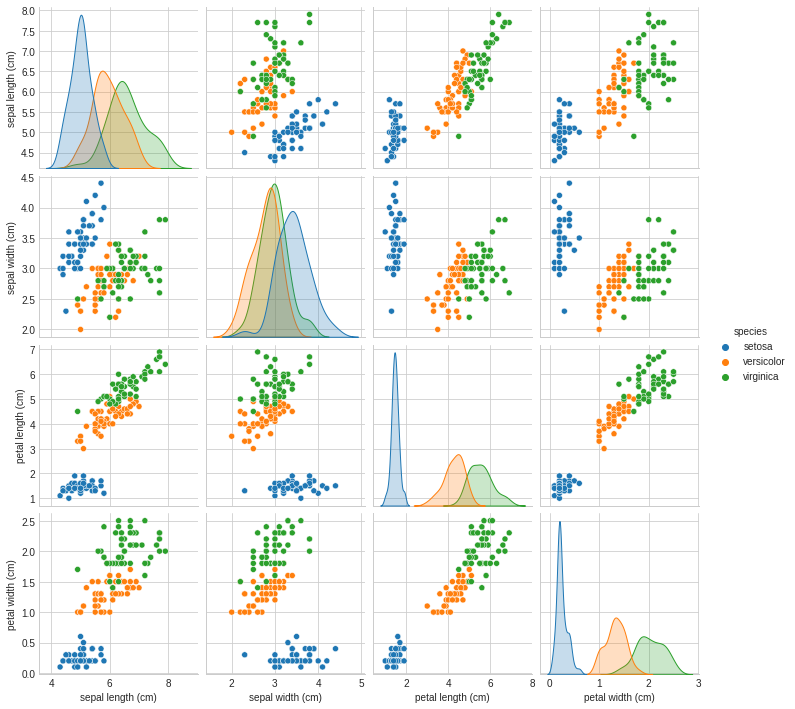

In [ ]:
import seaborn as sns

sns.pairplot(iris_df, hue='species');

## 붓꽃 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,[2,3]], iris.target, 
                                                    test_size=0.2, random_state=1,stratify=iris.target)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [ ]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

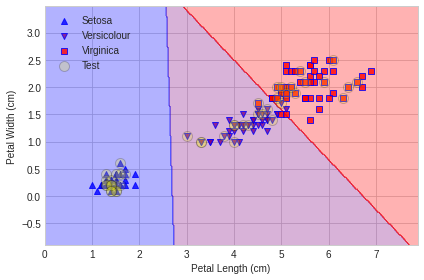

In [ ]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
              alpha=0.8, c=colors[idx],
              marker=markers[idx], label=species[cl],
              edgecolor='b')

X_comb_test, y_comb_test = X[range(105, 150),:], y[range(105, 150)]
plt.scatter(X_comb_test[:,0], X_comb_test[:,1],
            c='yellow', edgecolor='k', alpha=0.2,
            linewidth=1, marker='o',
            s=100, label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.tight_layout();

In [ ]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1', 'l2'],
               'C':[2.0, 2.2, 2.3, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid= param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid=[{'C': [2.0, 2.2, 2.3, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [ ]:
result = gs.fit(iris.data, iris.target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [ ]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.3)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.3, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000304,0.000058,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.090614,0.023734,0.000664,0.000044,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000340,0.000034,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.086074,0.022746,0.000625,0.000054,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.001682,0.004167,0.000000,0.000000,2.3,l1,"{'C': 2.3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.083254,0.016033,0.002062,0.002837,2.3,l2,"{'C': 2.3, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000265,0.000062,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.085400,0.020934,0.000698,0.000107,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000260,0.000049,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.090155,0.022340,0.000662,0.000043,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [ ]:
import pandas as pd

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


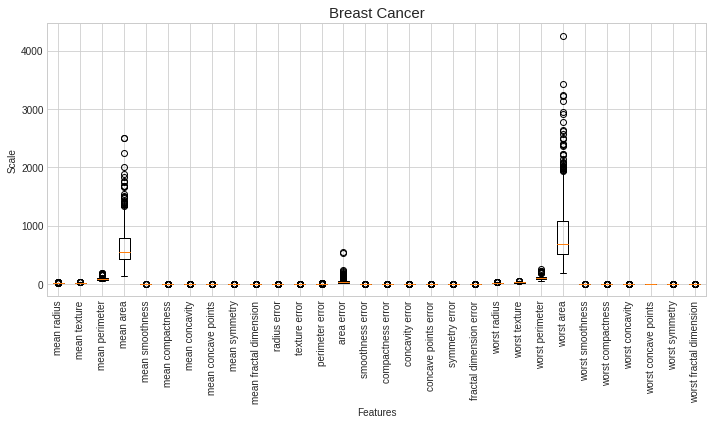

In [ ]:
fig = plt.figure(figsize=[10,6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout();

## 유방암 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(X,y)

In [ ]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.960093896713615
평가 데이터 점수: 0.958041958041958


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_loss'))
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(loss='squared_loss'))])

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7200955531489184
평가 데이터 점수: 0.770003471881367


## 붓꽃 데이터에 대한 SGD 분류

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9642857142857143
평가 데이터 점수: 0.9473684210526315


## 유방암 데이터에 대한 SGD 분류

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9812206572769953
평가 데이터 점수: 0.951048951048951
